In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
train_df = pd.read_csv('Dataset/sign_mnist_train.csv')
test_df = pd.read_csv('Dataset/sign_mnist_test.csv')

In [29]:
print(train_df.shape)
print(test_df.shape)

train_df.head()

(27455, 785)
(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


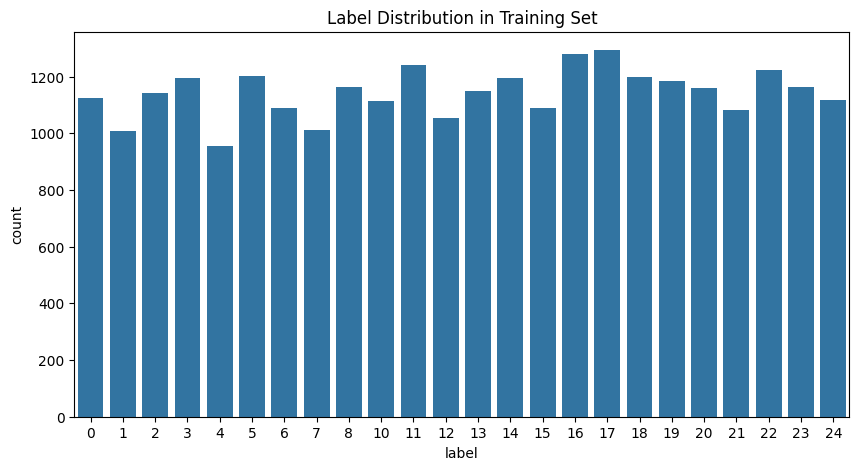

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=train_df)
plt.title('Label Distribution in Training Set')
plt.show()

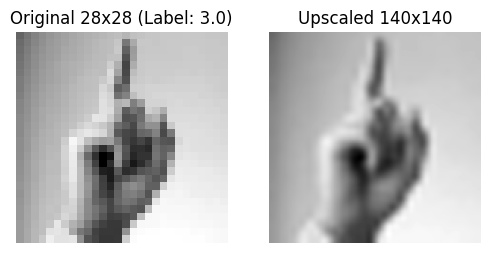

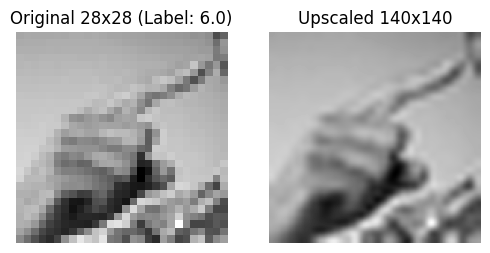

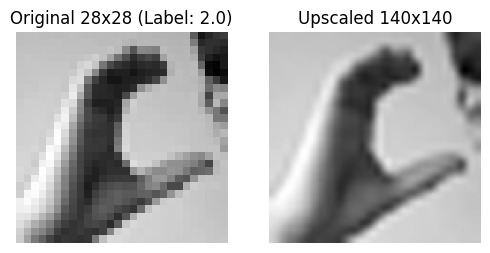

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def upscale_image(pixels, scale_factor=5):
    image = np.array(pixels).reshape(28, 28)
    
    upscaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    
    return upscaled_image

for i in range(3):
    row = train_df.iloc[i]
    label = row.iloc[0] 
    pixels = row.iloc[1:]  
    
    upscaled_image = upscale_image(pixels, scale_factor=5)  
    
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(pixels).reshape(28, 28), cmap='gray')
    plt.title(f'Original 28x28 (Label: {label})')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(upscaled_image, cmap='gray')
    plt.title(f'Upscaled {upscaled_image.shape[0]}x{upscaled_image.shape[1]}')
    plt.axis('off')
    
    plt.show()

In [32]:
print(f'Missing values in training set: {train_df.isnull().sum().sum()}')
print(f'Missing values in test set: {test_df.isnull().sum().sum()}')

Missing values in training set: 0
Missing values in test set: 0


In [34]:
train_df.iloc[:, 1:] = train_df.iloc[:, 1:].astype('float64') / 255.0
test_df.iloc[:, 1:] = test_df.iloc[:, 1:].astype('float64') / 255.0